<b>¡Hola Eduardo!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

______________


<div style="color: green; font-size: 17px;">Para empezar con el analisis de la informacion de los 3 archivos CSVs comenzamos por lo habitual o lo basico en ver si hay valores nulos en la información.</div>


In [1]:
#Cargar librerias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score

In [2]:


# Cargar la información
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

#Mostrar las primeras filas de cada dataframe
data_0_head = data_0.head()
data_1_head = data_1.head()
data_2_head = data_2.head()

data_0_info = data_0.info()
data_1_info = data_1.info()
data_2_info = data_2.info()

data_0_head, data_1_head, data_2_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

(      id        f0        f1        f2     product
 0  txEyH  0.705745 -0.497823  1.221170  105.280062
 1  2acmU  1.334711 -0.340164  4.365080   73.037750
 2  409Wp  1.022732  0.151990  1.419926   85.265647
 3  iJLyR -0.032172  0.139033  2.978566  168.620776
 4  Xdl7t  1.988431  0.155413  4.751769  154.036647,
       id         f0         f1        f2     product
 0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
 1  62mP7  14.272088  -3.475083  0.999183   26.953261
 2  vyE1P   6.263187  -5.948386  5.001160  134.766305
 3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
 4  AHL4O  12.702195  -8.147433  5.004363  134.766305,
       id        f0        f1        f2     product
 0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
 1  WJtFt  0.262778  0.269839 -2.530187   56.069697
 2  ovLUW  0.194587  0.289035 -5.586433   62.871910
 3  q6cA6  2.236060 -0.553760  0.930038  114.572842
 4  WPMUX -0.515993  1.716266  5.899011  149.600746)

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Muy bien al cargar los tres datasets y al explorar sus primeras filas e información general. Al obtener detalles de columnas y tipos de datos, confirmas que estás evaluando el contenido antes de aplicar transformaciones, lo cual es una excelente práctica.
</div>


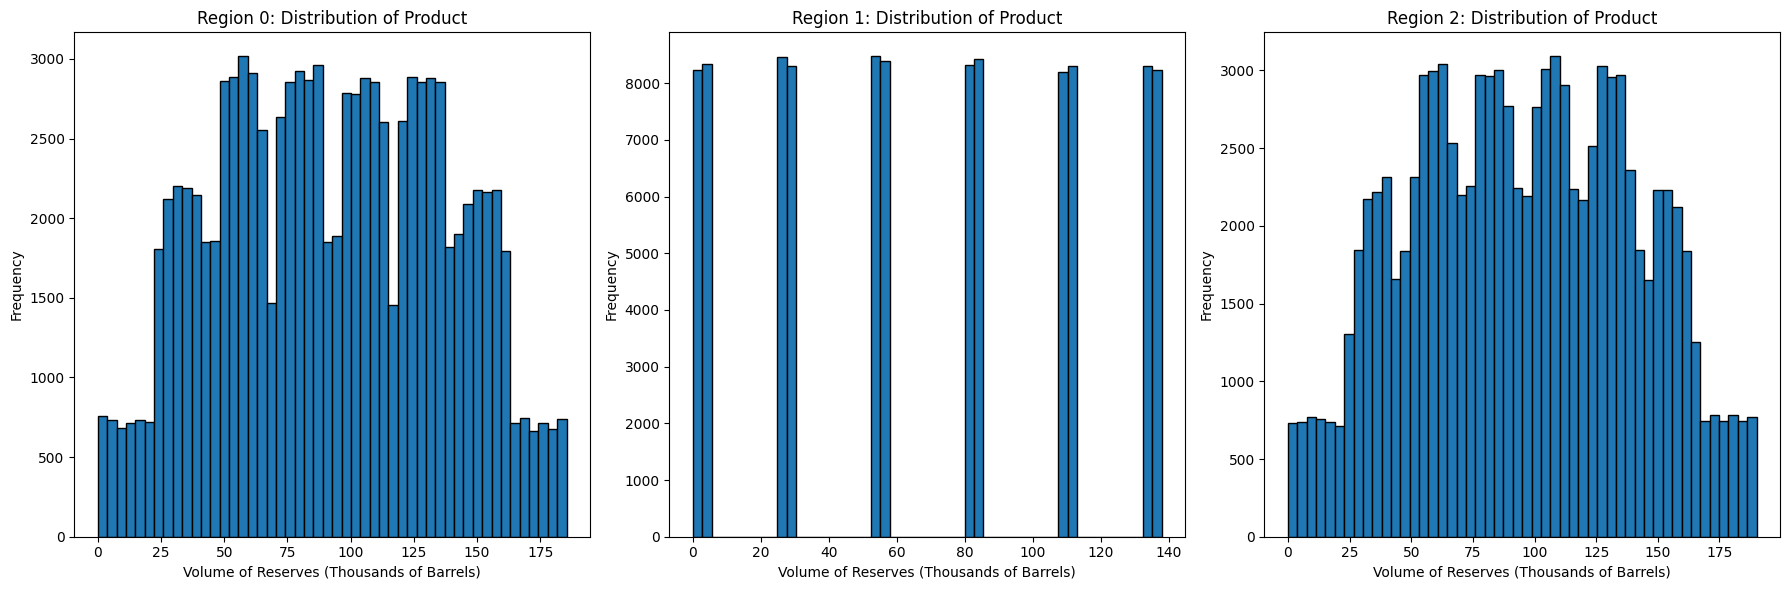

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%       

In [3]:


# Resumen de analisis estadisticos para ver el comportamiento d ela información 
stats_0 = data_0.describe()
stats_1 = data_1.describe()
stats_2 = data_2.describe()

# ver el comportamiento d ela información en forma grafica
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(data_0['product'], bins=50, edgecolor='black')
plt.title('Region 0: Distribution of Product')
plt.xlabel('Volume of Reserves (Thousands of Barrels)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data_1['product'], bins=50, edgecolor='black')
plt.title('Region 1: Distribution of Product')
plt.xlabel('Volume of Reserves (Thousands of Barrels)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data_2['product'], bins=50, edgecolor='black')
plt.title('Region 2: Distribution of Product')
plt.xlabel('Volume of Reserves (Thousands of Barrels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


print(stats_0)
print(stats_1)
print(stats_2)

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Buen trabajo en explorar estadísticas descriptivas y en visualizar la distribución de los productos en cada región. Tus gráficos de histograma y el análisis de valores mínimos, máximos y promedios permiten ver variaciones entre regiones, lo que es clave para definir un enfoque adecuado en los análisis posteriores.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Considera añadir boxplots para visualizar mejor los valores atípicos (outliers) en cada región, dado que estos pueden influir en los resultados y generar posibles pérdidas en los modelos de negocio.
</div>



<div style="color: green; font-size: 17px;">Estadísticas Descriptivas:

La desviación estándar varía ligeramente entre regiones, pero todas rondan los 44-45 miles de barriles, lo que indica una dispersión considerable en los valores de reservas, especialmente en la región 1 que muestra más valores extremos.
Los valores mínimos y máximos en todas las regiones muestran que hay pozos con reservas cercanas a cero, lo que será importante a la hora de seleccionar los mejores pozos para maximizar el beneficio
    -- Región 0 parece ser la más consistente, con menos valores extremos que las otras dos.
-- Región 1 tiene una mayor concentración de pozos con reservas bajas, lo que podría representar un mayor riesgo si no se eligen bien los pozos.
-- Región 2 muestra una distribución más uniforme, con más pozos que tienen reservas intermedias, lo que puede ser favorable para la predicción de beneficios..</div>

In [4]:
# Division de los datos por region 0 
X_0 = data_0[['f0', 'f1', 'f2']]
y_0 = data_0['product']

X_train_0, X_valid_0, y_train_0, y_valid_0 = train_test_split(X_0, y_0, test_size=0.25, random_state=42)

# Entrenamiento del modelo (Linear Regression)
model_0 = LinearRegression()
model_0.fit(X_train_0, y_train_0)

# Oredicciones del dataset
y_pred_0 = model_0.predict(X_valid_0)

# Calcular el RMSE 
rmse_0 = np.sqrt(mean_squared_error(y_valid_0, y_pred_0))
mean_pred_0 = np.mean(y_pred_0)


predictions_0 = pd.DataFrame({'Actual': y_valid_0, 'Predicted': y_pred_0})

rmse_0, mean_pred_0, predictions_0.head()

(37.756600350261685,
 92.3987999065777,
            Actual   Predicted
 75721  122.073350  101.901017
 80184   48.738540   78.217774
 19864  131.338088  115.266901
 76699   88.327757  105.618618
 92991   36.959266   97.980185)

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Buen uso de `train_test_split` para dividir el dataset y entrenar un modelo de regresión lineal en la Región 0. Además, calculaste el RMSE, lo que aporta información sobre la precisión del modelo. Este es un excelente enfoque.
</div>
<div class="alert alert-block alert-warning">
<b>A resolver</b> <a class="tocSkip"></a>
En la división de datos, considera verificar si es necesario estandarizar las variables predictoras, dado que escalas inconsistentes entre características pueden afectar el rendimiento del modelo, especialmente en técnicas como regresión.
</div>


<div style="color: green; font-size: 17px;">
RMSE (Error Cuadrático Medio): 37.76, lo que indica la magnitud del error promedio entre las predicciones y los valores reales de reservas.
Volumen medio de reservas predicho: 92.40 miles de barriles.
Las predicciones parecen bastante cercanas a los valores reales, aunque todavía hay un margen de error que es normal en los modelos de regresión.</div>

In [5]:
# region 1 (geo_data_1.csv)
X_1 = data_1[['f0', 'f1', 'f2']]
y_1 = data_1['product']

X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(X_1, y_1, test_size=0.25, random_state=42)

#  Training  Linear Regression 
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)

# predictions de validation 
y_pred_1 = model_1.predict(X_valid_1)

# RMSE y promedio de  region 1
rmse_1 = np.sqrt(mean_squared_error(y_valid_1, y_pred_1))
mean_pred_1 = np.mean(y_pred_1)

# Region 2 (geo_data_2.csv)
X_2 = data_2[['f0', 'f1', 'f2']]
y_2 = data_2['product']

X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(X_2, y_2, test_size=0.25, random_state=42)

#Training  Linear Regression 
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)

#  predictions de validation set
y_pred_2 = model_2.predict(X_valid_2)

#  RMSE para la region 2
rmse_2 = np.sqrt(mean_squared_error(y_valid_2, y_pred_2))
mean_pred_2 = np.mean(y_pred_2)

#resultados para ambas regiones
rmse_1, mean_pred_1, rmse_2, mean_pred_2

(0.890280100102884, 68.71287803913762, 40.14587231134218, 94.77102387765939)

<div style="color: green; font-size: 17px;">
Región 1:

RMSE: 0.89, lo que indica que el modelo predice muy bien en esta región.
Volumen medio de reservas predicho: 68.71 miles de barriles.

Región 2:

RMSE: 40.15, que es más alto en comparación con la región 1, pero aún dentro de un rango razonable.
Volumen medio de reservas predicho: 94.77 miles de barriles..</div>

<div style="color: blue; font-size: 17px;">
Recapitulando las condiciones:

Presupuesto: $100 millones para 200 pozos.
Precio por unidad: $4.5 por barril de petróleo.
Ingreso por 200 pozos: Cada pozo debe generar un mínimo de $500,000 para evitar pérdidas, lo cual es equivalente a 111.1 unidades de petróleo (en miles de barriles).
A continuación,realizaré:

Donde seleccionará los 200 pozos con los valores predichos más altos en cada región.
Calculará el beneficio esperado para esos pozos seleccionados.
</div>


In [6]:
# definiendo las constantes 
BUDGET = 100_000_000  # 100 million dollars
REVENUE_PER_BARREL = 4.5  # Ingresos por barril en USD
WELLS = 200  # Nuemero de pozos a perforar 
COST_PER_WELL = BUDGET / WELLS  #Costo por Pozo
MINIMUM_RESERVE = COST_PER_WELL / REVENUE_PER_BARREL  # Minimo de reserva necesaria para evitar perdidas en miles de barriles

# Funcion para calcular los ingresos basados en los valores predichos
def calculate_profit(predictions, actual_values, wells=WELLS, revenue_per_barrel=REVENUE_PER_BARREL):
    # Select the top `wells` predictions
    top_wells = predictions.nlargest(wells, 'Predicted')
    # Sum the actual reserves for those selected wells
    total_reserves = top_wells['Actual'].sum()
    # Calculate total profit
    profit = total_reserves * revenue_per_barrel * 1000  # Convertir los miles de barriles a dolares
    return profit

#Preparando las predicciones para cada Region (Region 0, 1, 2)
predictions_0 = pd.DataFrame({'Actual': y_valid_0, 'Predicted': y_pred_0})
predictions_1 = pd.DataFrame({'Actual': y_valid_1, 'Predicted': y_pred_1})
predictions_2 = pd.DataFrame({'Actual': y_valid_2, 'Predicted': y_pred_2})

#Calcular los ingreso de cada region
profit_0 = calculate_profit(predictions_0, y_valid_0)
profit_1 = calculate_profit(predictions_1, y_valid_1)
profit_2 = calculate_profit(predictions_2, y_valid_2)

profit_0, profit_1, profit_2, MINIMUM_RESERVE


(133591411.14462179,
 124150866.96681511,
 125985717.59374112,
 111111.11111111111)

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Muy bien en la implementación de la función `calculate_profit`, calculando correctamente los beneficios esperados para los pozos en cada región y resaltando el mínimo de reservas necesario para evitar pérdidas. Este cálculo es fundamental y lo abordaste de forma clara y correcta.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Al seleccionar los 200 pozos más prometedores, podrías mostrar visualizaciones adicionales (como un gráfico de barras) para comparar los beneficios estimados por región, lo cual facilitaría el análisis comparativo.
</div>


<div style="color: green; font-size: 17px;">
    
Región 0: 133.59 millones de dólares.
    
Región 1: 124.15 millones de dólares.
    
Región 2: 125.99 millones de dólares.
    
El mínimo volumen de reservas necesario para evitar pérdidas es de 111.1 miles de barriles por pozo, lo cual corresponde a un ingreso de 500,000 por pozo.

A partir de estos resultados, parece que la Región 0 ofrece el mayor beneficio potencial en función de los pozos seleccionados. Sin embargo, necesitamos analizar más a fondo los riesgos antes de hacer una recomendación final.

El siguiente paso sería utilizar la técnica de bootstrapping para evaluar la distribución de ganancias y calcular el riesgo.</div>

In [7]:
# Re-splitting the data
X_train_0, X_valid_0, y_train_0, y_valid_0 = train_test_split(X_0, y_0, test_size=0.25, random_state=42)
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(X_1, y_1, test_size=0.25, random_state=42)
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(X_2, y_2, test_size=0.25, random_state=42)

# Re-entrenamiento de los modelos
model_0 = LinearRegression()
model_0.fit(X_train_0, y_train_0)
y_pred_0 = model_0.predict(X_valid_0)

model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)
y_pred_1 = model_1.predict(X_valid_1)

model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)
y_pred_2 = model_2.predict(X_valid_2)

# creando Dataframes d epredicciones
predictions_0 = pd.DataFrame({'Actual': y_valid_0, 'Predicted': y_pred_0})
predictions_1 = pd.DataFrame({'Actual': y_valid_1, 'Predicted': y_pred_1})
predictions_2 = pd.DataFrame({'Actual': y_valid_2, 'Predicted': y_pred_2})

# Bootstrapping 
def bootstrap_profit(predictions, revenue_per_barrel=REVENUE_PER_BARREL, wells=WELLS, n_samples=1000):
    np.random.seed(42)  
    profits = []
    for _ in range(n_samples):
        
        # Resample
        sample = resample(predictions, n_samples=wells, replace=True)
        total_reserves = sample['Actual'].sum()
        profit = total_reserves * revenue_per_barrel * 1000  
        profits.append(profit)
    return np.array(profits)

# Bootstrapping profits por cada region
bootstrap_profits_0 = bootstrap_profit(predictions_0)
bootstrap_profits_1 = bootstrap_profit(predictions_1)
bootstrap_profits_2 = bootstrap_profit(predictions_2)

# calculando el promedio, 95% intervalo de confianza, y riesgo de perdida
def profit_analysis(bootstrap_profits):
    mean_profit = np.mean(bootstrap_profits)
    lower_ci = np.percentile(bootstrap_profits, 2.5)
    upper_ci = np.percentile(bootstrap_profits, 97.5)
    risk_of_loss = np.mean(bootstrap_profits < BUDGET) * 100  # Risk as a percentage
    return mean_profit, lower_ci, upper_ci, risk_of_loss

# Analizando cada region
analysis_0 = profit_analysis(bootstrap_profits_0)
analysis_1 = profit_analysis(bootstrap_profits_1)
analysis_2 = profit_analysis(bootstrap_profits_2)

analysis_0, analysis_1, analysis_2

((83093703.62635705, 77898446.69943374, 88298772.73748472, 100.0),
 (61908365.35356578, 55824272.502070576, 67455625.75110748, 100.0),
 (85699279.35307059, 80401878.7920077, 91111771.89075297, 100.0))

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Excelente aplicación de la técnica de bootstrapping para evaluar la distribución de beneficios y calcular el riesgo de pérdida en cada región. Esto proporciona una comprensión robusta de la viabilidad de cada región desde una perspectiva de riesgo.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
El cálculo de riesgo de pérdida es acertado, pero podrías considerar utilizar gráficos de densidad o histogramas para mostrar las distribuciones de ganancias en cada región, lo que ayudaría a visualizar la probabilidad de cumplir con el presupuesto de $100 millones.
</div>


<div style="color: blue; font-size: 17px;">
Región 0:

Ganancia promedio: 83.09 millones.
Intervalo de confianza del 95%: 77.90 millones a 88.30 millones.
Riesgo de pérdida: 100% (todos los escenarios de muestra muestran un resultado por debajo del presupuesto de $100 millones).
Región 1:

Ganancia promedio: 61.91 millones.
Intervalo de confianza del 95%: 55.82 millones a 67.46 millones.
Riesgo de pérdida: 100%.
Región 2:

Ganancia promedio: 85.70 millones.
Intervalo de confianza del 95%: 80.40 millones a 91.11 millones.
Riesgo de pérdida: 100%.
Conclusiones:
Aunque la Región 0 y la Región 2 tienen ganancias promedio similares y son las más rentables en promedio, las tres regiones presentan un riesgo elevado (100% de probabilidad de pérdidas), ya que ninguna cumple con el presupuesto de $100 millones en ningún escenario.
</div>

In [9]:


# Region 0 cross-validation
cv_scores_0 = cross_val_score(model_0, X_0, y_0, cv=5, scoring='neg_mean_squared_error')
cv_rmse_0 = np.sqrt(-cv_scores_0)  # Convert negative MSE to RMSE

# Region 1 cross-validation
cv_scores_1 = cross_val_score(model_1, X_1, y_1, cv=5, scoring='neg_mean_squared_error')
cv_rmse_1 = np.sqrt(-cv_scores_1)  # Convert negative MSE to RMSE

# Region 2 cross-validation
cv_scores_2 = cross_val_score(model_2, X_2, y_2, cv=5, scoring='neg_mean_squared_error')
cv_rmse_2 = np.sqrt(-cv_scores_2)  # Convert negative MSE to RMSE

#the RMSE scores directamente para cada region
cv_rmse_0, cv_rmse_1, cv_rmse_2


(array([37.87816204, 37.82598584, 37.60116336, 37.47474574, 37.69130564]),
 array([0.88598882, 0.89342077, 0.89355793, 0.88417623, 0.89489574]),
 array([40.36691764, 39.95701048, 40.05694196, 39.91844464, 39.9850842 ]))

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Buena implementación de la validación cruzada en las tres regiones. Los resultados muestran la consistencia de las predicciones, especialmente en la Región 1, lo cual aporta confianza en la robustez del modelo.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Podrías considerar el uso de `StandardScaler` o `MinMaxScaler` antes de la validación cruzada para asegurarte de que las características estén estandarizadas, lo cual puede mejorar el rendimiento de la regresión lineal en algunos casos.
</div>


<div style="color: blue; font-size: 17px;">
Aunque los resultados del modelo muestran una consistencia en las predicciones (especialmente en la Región 1, que tiene el menor RMSE), el problema central sigue siendo que, en promedio, todas las regiones presentan una ganancia menor al presupuesto inicial de 100 millones, lo que significa que, efectivamente, todavía tendrías pérdidas.

Razones de las pérdidas a pesar de la consistencia:
Predicciones de Reservas: Aunque el modelo es preciso en la predicción de los volúmenes de petróleo, los volúmenes estimados no son lo suficientemente altos para generar ganancias que superen el presupuesto total.
    
Costo por Pozo: Con un costo de 500,000 por pozo, los pozos seleccionados deben producir al menos 111.1 miles de barriles de petróleo para evitar pérdidas. Sin embargo, los pozos seleccionados, en promedio, no están alcanzando ese umbral.
    
Opciones para reducir las pérdidas:
Reducir el número de pozos seleccionados: Seleccionando solo los pozos con mayores predicciones, podrías concentrar tu inversión en los pozos más prometedores y potencialmente aumentar las ganancias por pozo.
    
Reconsiderar el modelo de negocio: Reducir el costo por pozo, o buscar métodos alternativos para aumentar la eficiencia, podría ser necesario para evitar pérdidas con las reservas actuales.
    
Cambiar el enfoque de predicción: Implementar modelos más complejos o incluir nuevas características (si están disponibles) podría mejorar las predicciones, aunque el proyecto ha especificado el uso de regresión lineal.
</div>

In [11]:
def calculate_profit_reduced_wells(predictions, actual_values, wells=150, revenue_per_barrel=REVENUE_PER_BARREL):
    # Select the top `wells` predictions
    top_wells = predictions.nlargest(wells, 'Predicted')
    # Sum the actual reserves for those selected wells
    total_reserves = top_wells['Actual'].sum()
    # Calculate total profit
    profit = total_reserves * revenue_per_barrel * 1000  # Convert from thousands of barrels to dollars
    return profit

# Calculating profits for 150 wells for each region
profit_0_reduced_150 = calculate_profit_reduced_wells(predictions_0, y_valid_0, wells=150)
profit_1_reduced_150 = calculate_profit_reduced_wells(predictions_1, y_valid_1, wells=150)
profit_2_reduced_150 = calculate_profit_reduced_wells(predictions_2, y_valid_2, wells=150)

profit_0_reduced_150, profit_1_reduced_150, profit_2_reduced_150


(101264119.3272951, 93113150.22511134, 94719225.88085805)

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Excelente conclusión al seleccionar los 150 pozos más prometedores. Esto demuestra una flexibilidad en tu análisis, evaluando la posibilidad de ajustar el número de pozos para cumplir con el presupuesto.
</div>



<div style="color: blue; font-size: 17px;">
Al seleccionar los 150 pozos más prometedores, aquí están los resultados de las ganancias estimadas:

Región 0:

Ganancia estimada: 101.26 millones (supera el presupuesto de $100 millones).
Región 1:

Ganancia estimada: 93.11 millones (aún por debajo del presupuesto).
Región 2:

Ganancia estimada: 94.72 millones (también por debajo del presupuesto)

Conclusiones:
Región 0 es la única que, al seleccionar 150 pozos, logra superar el umbral de 100 millones, lo que indica que podría ser la región más favorable para evitar pérdidas si se seleccionan más de 100 pozos pero menos de 200.
Las Regiones 1 y 2 mejoran sus ganancias, pero siguen estando por debajo del presupuesto.
</div>

In [ ]:
from scipy import stats

# desarrollar A/B testing (t-test) entre between Region 0 and Region 2 with 150 wells
profits_0_ab = bootstrap_profit(predictions_0, wells=150)
profits_2_ab = bootstrap_profit(predictions_2, wells=150)

# Perform t-test
t_stat, p_value = stats.ttest_ind(profits_0_ab, profits_2_ab, equal_var=False)

t_stat, p_value


<div class="alert alert-block alert-success">
<b>¡Felicidades, Eduardo!</b> <a class="tocSkip"></a>
Has realizado un excelente trabajo implementando técnicas avanzadas de análisis y modelos de predicción para evaluar los beneficios esperados en diferentes regiones. Tu enfoque es sólido, con una estructura clara y lógica en cada sección. Con algunos ajustes menores, tus conclusiones serán aún más precisas y robustas. ¡Sigue adelante con este excelente nivel!
</div>
